In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
img = cv2.imread('c:/tower.jpg',cv2.IMREAD_GRAYSCALE)

In [6]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')

In [14]:
plt.hist(img.ravel(),256)

(array([  3.16260000e+04,   6.51800000e+03,   3.21700000e+03,
          2.60200000e+03,   2.88300000e+03,   3.00900000e+03,
          3.40600000e+03,   3.87900000e+03,   4.05400000e+03,
          4.28700000e+03,   4.31600000e+03,   3.99900000e+03,
          3.81800000e+03,   3.54400000e+03,   3.19800000e+03,
          2.84000000e+03,   2.65700000e+03,   2.31600000e+03,
          2.08800000e+03,   1.88900000e+03,   1.64900000e+03,
          1.41100000e+03,   1.22800000e+03,   1.11100000e+03,
          9.60000000e+02,   9.06000000e+02,   7.91000000e+02,
          7.23000000e+02,   6.31000000e+02,   6.28000000e+02,
          5.84000000e+02,   5.49000000e+02,   4.68000000e+02,
          4.52000000e+02,   4.40000000e+02,   4.54000000e+02,
          4.27000000e+02,   3.95000000e+02,   4.05000000e+02,
          3.63000000e+02,   3.03000000e+02,   3.07000000e+02,
          3.09000000e+02,   2.75000000e+02,   2.69000000e+02,
          2.71000000e+02,   2.71000000e+02,   2.33000000e+02,
        

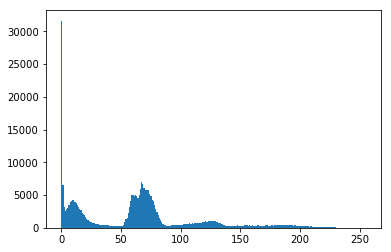

In [15]:
plt.show()

In [17]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

In [18]:
cdf = hist.cumsum()

In [20]:
cdf_normalized = cdf * hist.max()/ cdf.max()

In [21]:
plt.plot(cdf_normalized, color = 'b')

In [22]:
plt.hist(img.flatten(),256,[0,256], color = 'r')

(array([  3.16260000e+04,   6.51800000e+03,   3.21700000e+03,
          2.60200000e+03,   2.88300000e+03,   3.00900000e+03,
          3.40600000e+03,   3.87900000e+03,   4.05400000e+03,
          4.28700000e+03,   4.31600000e+03,   3.99900000e+03,
          3.81800000e+03,   3.54400000e+03,   3.19800000e+03,
          2.84000000e+03,   2.65700000e+03,   2.31600000e+03,
          2.08800000e+03,   1.88900000e+03,   1.64900000e+03,
          1.41100000e+03,   1.22800000e+03,   1.11100000e+03,
          9.60000000e+02,   9.06000000e+02,   7.91000000e+02,
          7.23000000e+02,   6.31000000e+02,   6.28000000e+02,
          5.84000000e+02,   5.49000000e+02,   4.68000000e+02,
          4.52000000e+02,   4.40000000e+02,   4.54000000e+02,
          4.27000000e+02,   3.95000000e+02,   4.05000000e+02,
          3.63000000e+02,   3.03000000e+02,   3.07000000e+02,
          3.09000000e+02,   2.75000000e+02,   2.69000000e+02,
          2.71000000e+02,   2.71000000e+02,   2.33000000e+02,
        

In [23]:
plt.xlim([0,256])

(0, 256)

In [24]:
plt.legend(('cdf','histogram'), loc = 'upper left')

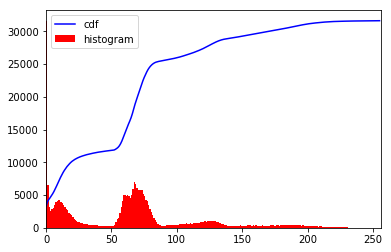

In [25]:
plt.show()

In [26]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [27]:
img2 = cdf[img]

In [28]:
img3 = cv2.imread('c:/tower.jpg',0)

In [29]:
equ = cv2.equalizeHist(img3) #histrogram equalization function

In [30]:
res = np.hstack((img3,equ)) #stacking images side-by-side

In [43]:
cv2.imwrite('res.png',res)

True

In [44]:
img_stack = cv2.imread('res.png',cv2.IMREAD_GRAYSCALE)

In [45]:
plt.imshow(img_stack, cmap = 'gray', interpolation = 'bicubic')


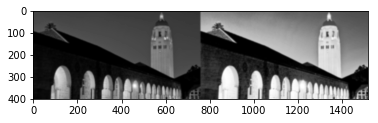

In [46]:
plt.show()

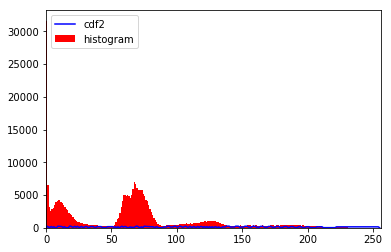

In [47]:
hist,bins = np.histogram(img3.flatten(),256,[0,256])

cdf2 = hist.cumsum()
cdf_normalized2 = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized2, color = 'b')
plt.hist(img3.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf2','histogram'), loc = 'upper left')
plt.show()

In [48]:
cdf_m2 = np.ma.masked_equal(cdf,0)
cdf_m2 = (cdf_m2 - cdf_m2.min())*255/(cdf_m2.max()-cdf_m2.min())
cdf2 = np.ma.filled(cdf_m,0).astype('uint8')

In [49]:
img4 = cdf2[img3]